In [ ]:
#@title **Importar bibliotecas** { vertical-output: true, form-width: "60%" }

# Para manipula√ß√£o e an√°lise de dados
import pandas as pd

# Para visualiza√ß√£o de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Para realizar c√°lculos estat√≠sticos
import numpy as np
from scipy.stats import norm

# Para lidar com o Google Drive (voc√™ j√° importou, mas n√£o custa refor√ßar)
from google.colab import drive


In [ ]:
#@title **Montar Google Drive e dar permiss√£o** { vertical-output: true, form-width: "30%" }
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive
%ls

/content/drive
MyDrive/


In [ ]:
from google.colab import drive
drive.flush_and_unmount()

In [ ]:
#@title **Prepara√ß√£o dos Dados**
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/INFLUD21-01-05-2023.csv", sep=';')

df.head()


<ipython-input-4-d122c9a47043>:2: DtypeWarning: Columns (15,59,61,62,63,91,93,105,107,114,116,117,118,122,143) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/INFLUD21-01-05-2023.csv", sep=';')


DT_NOTIFIC  SEM_NOT  DT_SIN_PRI  SEM_PRI SG_UF_NOT  \
0  06/01/2021        1  06/01/2021        1        BA   
1  08/01/2021        1  03/01/2021        1        BA   
2  09/01/2021        1  07/01/2021        1        PR   
3  06/01/2021        1  05/01/2021        1        PR   
4  11/01/2021        2  04/01/2021        1        RS   

                          ID_REGIONA  CO_REGIONA   ID_MUNICIP  CO_MUN_NOT  \
0  NUCLEO REGIONAL DE SAUDE NORDESTE      1382.0   ALAGOINHAS      290070   
1       NUCLEO REGIONAL DE SAUDE SUL      1385.0      ITABUNA      291480   
2                 02RS METROPOLITANA      1356.0     CURITIBA      410690   
3                      17RS LONDRINA      1371.0     LONDRINA      411370   
4                            007 CRS      1596.0  DOM PEDRITO      430660   

                           ID_UNIDADE  ...  DOSE_2_COV DOSE_REF FAB_COV_1  \
0       HOSPITAL REGIONAL DANTAS BIAO  ...         NaN      NaN       NaN   
1       HOSPITAL CALIXTO MIDLEJ FILHO  ...         NaN      NaN       NaN   
2  COMPLEXO HOSPITALAR DO TRABALHADOR  ...         NaN      NaN       NaN   
3  HCL HOSPITAL DO CANCER DE LONDRINA  ...         NaN      NaN       NaN   
4                   HOSPITAL SAO LUIZ  ...         NaN      NaN       NaN   

   FAB_COV_2  FAB_COVREF LOTE_REF  LAB_PR_COV  LOTE_1_COV  LOTE_2_COV  \
0        NaN         NaN      NaN         NaN         NaN         NaN   
1        NaN         NaN      NaN         NaN         NaN         NaN   
2        NaN         NaN      NaN         NaN         NaN         NaN   
3        NaN         NaN      NaN         NaN         NaN         NaN   
4        NaN         NaN      NaN         NaN         NaN         NaN   

  FNT_IN_COV  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  

[5 rows x 166 columns]

In [ ]:
#@title **M√©dia de sintomas por faixa de idade**
import pandas as pd
import numpy as np
from google.colab import drive

# Montar o Google Drive
drive.mount('/content/drive')

# Definir o caminho do arquivo
file_path = "/content/drive/MyDrive/Colab Notebooks/INFLUD21-01-05-2023.csv"

# Definir colunas necess√°rias
sintomas_colunas = ['FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP',
                    'SATURACAO', 'DIARREIA', 'VOMITO', 'DOR_ABD', 'FADIGA',
                    'PERD_OLFT', 'PERD_PALA', 'OUTRO_SIN']

colunas_necessarias = ['CLASSI_FIN', 'NU_IDADE_N', 'TP_IDADE'] + sintomas_colunas

# Carregar apenas as colunas necess√°rias
df = pd.read_csv(file_path, usecols=colunas_necessarias, delimiter=';', encoding='latin1')

# Remover espa√ßos extras nos nomes das colunas
df.columns = df.columns.str.strip()

# Filtrar apenas casos confirmados de COVID-19
df_covid = df[df['CLASSI_FIN'] == 5].copy()

# Remover linhas com valores ausentes nas colunas de idade
df_covid.dropna(subset=['NU_IDADE_N', 'TP_IDADE'], inplace=True)

# Converter idade para anos
df_covid['IDADE_ANOS'] = np.where(df_covid['TP_IDADE'] == 1, df_covid['NU_IDADE_N'] / 365,
                          np.where(df_covid['TP_IDADE'] == 2, df_covid['NU_IDADE_N'] / 12, df_covid['NU_IDADE_N']))

# Criar faixas et√°rias
bins = [0, 18, 35, 50, 65, 80, 100]
labels = ['0-18', '19-35', '36-50', '51-65', '66-80', '81-100']
df_covid['FAIXA_IDADE'] = pd.cut(df_covid['IDADE_ANOS'], bins=bins, labels=labels, right=False)

# Verificar se todas as colunas de sintomas existem
sintomas_existentes = [col for col in sintomas_colunas if col in df_covid.columns]

# Criar coluna de quantidade de sintomas apenas para colunas existentes
df_covid['QT_SINTOMAS'] = df_covid[sintomas_existentes].eq(1).sum(axis=1)

# Calcular estat√≠sticas dos sintomas por faixa et√°ria
estatisticas_sintomas = df_covid.groupby('FAIXA_IDADE')['QT_SINTOMAS'].agg(['mean', 'median', 'std']).rename(
    columns={'mean': 'M√©dia', 'median': 'Mediana', 'std': 'Desvio Padr√£o'}
)

# Exibir resultados
print(estatisticas_sintomas)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                M√©dia  Mediana  Desvio Padr√£o
FAIXA_IDADE                                  
0-18         3.744827      4.0       1.907682
19-35        4.641151      4.0       2.233325
36-50        4.682830      5.0       2.156701
51-65        4.510072      4.0       2.089884
66-80        4.233688      4.0       2.014210
81-100       3.976013      4.0       1.930554


<ipython-input-3-34694944a99b>:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  estatisticas_sintomas = df_covid.groupby('FAIXA_IDADE')['QT_SINTOMAS'].agg(['mean', 'median', 'std']).rename(


<ipython-input-7-4ce0eb6178ed>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=estatisticas_sintomas.index, y=estatisticas_sintomas['M√©dia'], palette='viridis')


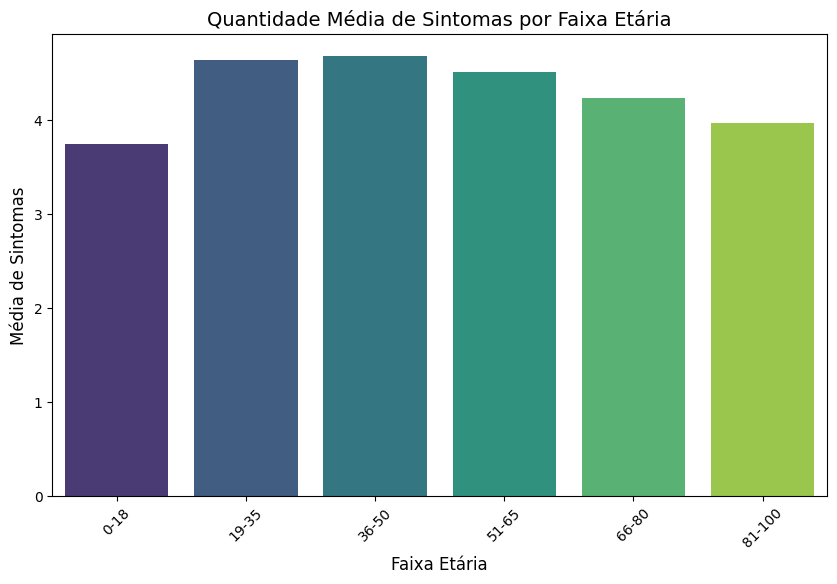

In [ ]:
#@title **M√©dia de sintomas por faixa de idade**
import matplotlib.pyplot as plt
import seaborn as sns

# Criar o gr√°fico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=estatisticas_sintomas.index, y=estatisticas_sintomas['M√©dia'], palette='viridis')

# Adicionar t√≠tulos e r√≥tulos
plt.title('Quantidade M√©dia de Sintomas por Faixa Et√°ria', fontsize=14)
plt.xlabel('Faixa Et√°ria', fontsize=12)
plt.ylabel('M√©dia de Sintomas', fontsize=12)
plt.xticks(rotation=45)

# Exibir o gr√°fico
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

**Resumo por Estado:**
            CASOS  OBITOS  PROBABILIDADE_OBITO
SG_UF_NOT                                     
SP         342210  105435             0.308100
MG         134344   42269             0.314633
RJ          89664   36754             0.409908
PR          87778   27408             0.312242
RS          76715   25957             0.338356
SC          53435   14174             0.265257
GO          52466   17065             0.325258
BA          43285   13545             0.312926
CE          38177   14659             0.383975
PA          27453    9701             0.353368
DF          25599    6543             0.255596
MS          21597    6857             0.317498
MT          20409    5533             0.271106
PE          20271    8184             0.403729
AM          18469    6632             0.359088
PB          15746    5631             0.357615
M

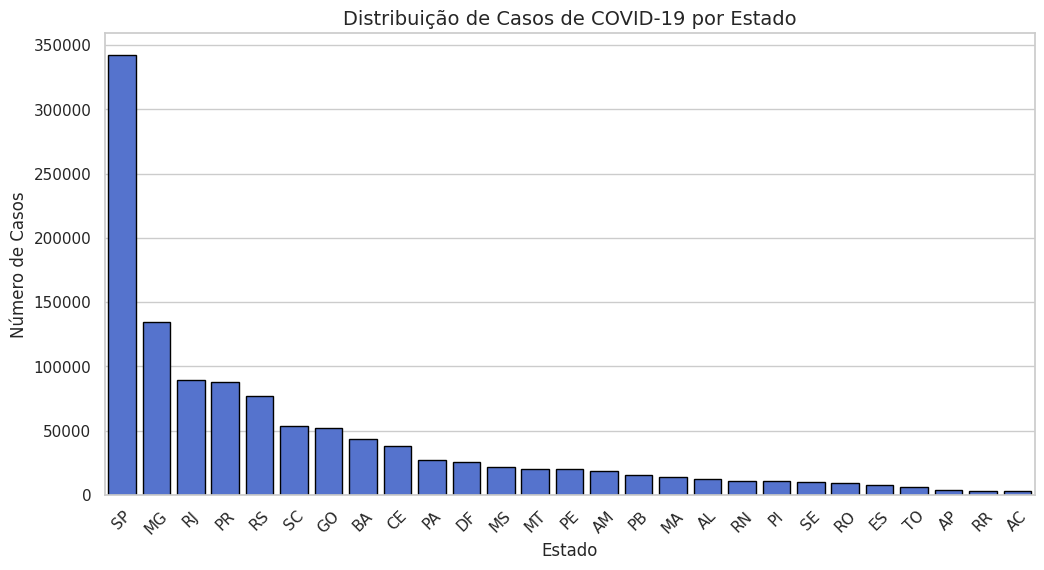

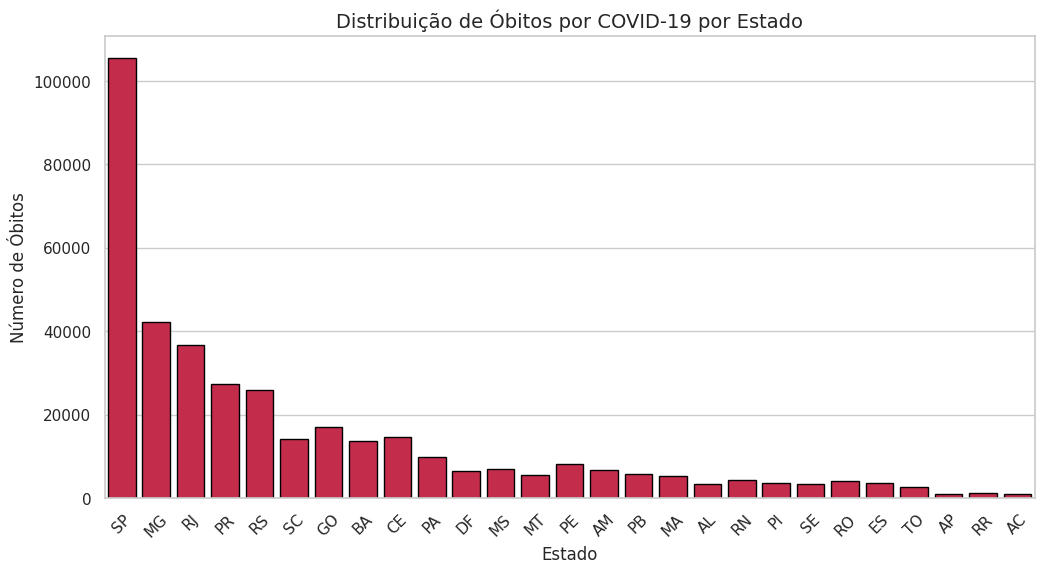

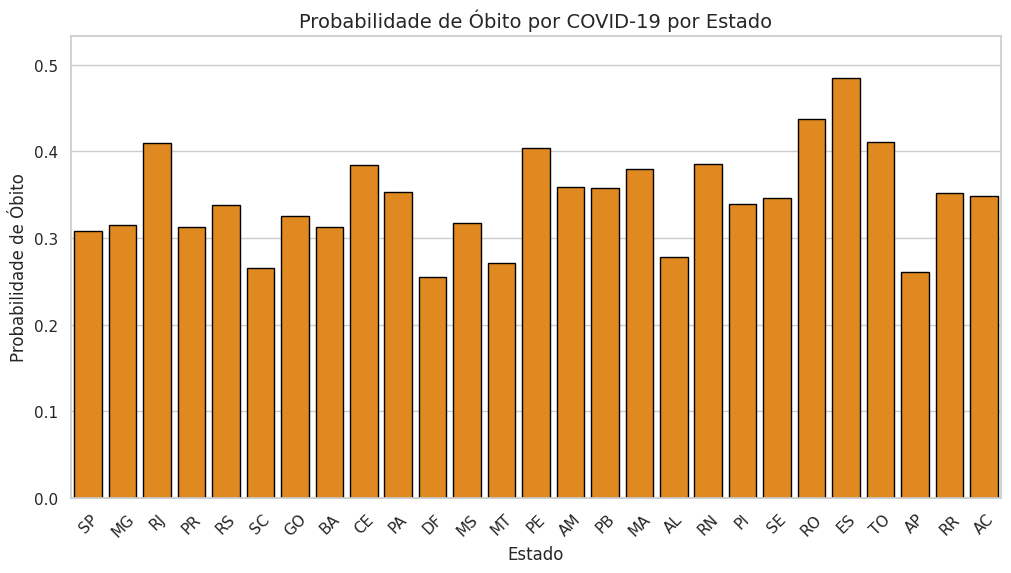

In [11]:
#@title **Distribui√ß√£o Geogr√°fica de Casos, √ìbitos e Probabilidade de √ìbito por Estado**
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

# Definir caminho do arquivo
file_path = "/content/drive/MyDrive/Colab Notebooks/INFLUD21-01-05-2023.csv"

# Definir colunas necess√°rias
colunas_necessarias = ['CLASSI_FIN', 'SG_UF_NOT', 'EVOLUCAO']

# Carregar apenas as colunas necess√°rias
df = pd.read_csv(file_path, usecols=colunas_necessarias, delimiter=';', encoding='latin1')

# Remover espa√ßos extras dos nomes das colunas
df.columns = df.columns.str.strip()

# Filtrar apenas casos confirmados de COVID-19
df_covid = df[df['CLASSI_FIN'] == 5].copy()

# Remover valores nulos essenciais
df_covid.dropna(subset=['SG_UF_NOT', 'EVOLUCAO'], inplace=True)

# Criar colunas de contagem de casos e √≥bitos
df_covid['CASOS'] = 1  # Cada linha representa um caso confirmado
df_covid['OBITOS'] = np.where(df_covid['EVOLUCAO'] == 2, 1, 0)  # √ìbito confirmado (EVOLUCAO == 2)

# Agrupar por estado
resumo_estados = df_covid.groupby('SG_UF_NOT').agg(
    CASOS=('CASOS', 'sum'),
    OBITOS=('OBITOS', 'sum')
)

# Calcular a probabilidade de √≥bito (taxa de letalidade) para cada estado
resumo_estados['PROBABILIDADE_OBITO'] = resumo_estados['OBITOS'] / resumo_estados['CASOS']

# Ordenar por n√∫mero de casos
resumo_estados = resumo_estados.sort_values(by='CASOS', ascending=False)

# Exibir os dados
print("\n**Resumo por Estado:**")
print(resumo_estados)

sns.set_theme(style="whitegrid")

# **Gr√°fico da Distribui√ß√£o de Casos por Estado**
plt.figure(figsize=(12, 6))
sns.barplot(x=resumo_estados.index, y=resumo_estados['CASOS'], color='royalblue', edgecolor='black')
plt.title('Distribui√ß√£o de Casos de COVID-19 por Estado', fontsize=14)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('N√∫mero de Casos', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# **Gr√°fico da Distribui√ß√£o de √ìbitos por Estado**
plt.figure(figsize=(12, 6))
sns.barplot(x=resumo_estados.index, y=resumo_estados['OBITOS'], color='crimson', edgecolor='black')
plt.title('Distribui√ß√£o de √ìbitos por COVID-19 por Estado', fontsize=14)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('N√∫mero de √ìbitos', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# **Gr√°fico da Probabilidade de √ìbito por Estado**
plt.figure(figsize=(12, 6))
sns.barplot(x=resumo_estados.index, y=resumo_estados['PROBABILIDADE_OBITO'], color='darkorange', edgecolor='black')
plt.title('Probabilidade de √ìbito por COVID-19 por Estado', fontsize=14)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Probabilidade de √ìbito', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, resumo_estados['PROBABILIDADE_OBITO'].max() * 1.1)
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-10-6fcb5abbc136>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid['IDADE_ANOS'] = np.where(df_covid['TP_IDADE'] == 1, df_covid['NU_IDADE_N'] / 365,
<ipython-input-10-6fcb5abbc136>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid['FAIXA_IDADE'] = pd.cut(df_covid['IDADE_ANOS'], bins=bins, labels=labels, right=False)
<ipython-input-10-6fcb5abbc136>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

Taxa de Mortalidade por Faixa Et√°ria e Sexo:
   FAIXA_IDADE CS_SEXO  Taxa Mortalidade
0         0-18       F          0.067504
1         0-18       M          0.063903
2        19-35       F          0.132149
3        19-35       M          0.129297
4        36-50       F          0.201352
5        36-50       M          0.189318
6        51-59       F          0.275918
7        51-59       M          0.290380
8        60-79       F          0.419660
9        60-79       M          0.457463
10         80+       F          0.561746
11         80+       M          0.618255


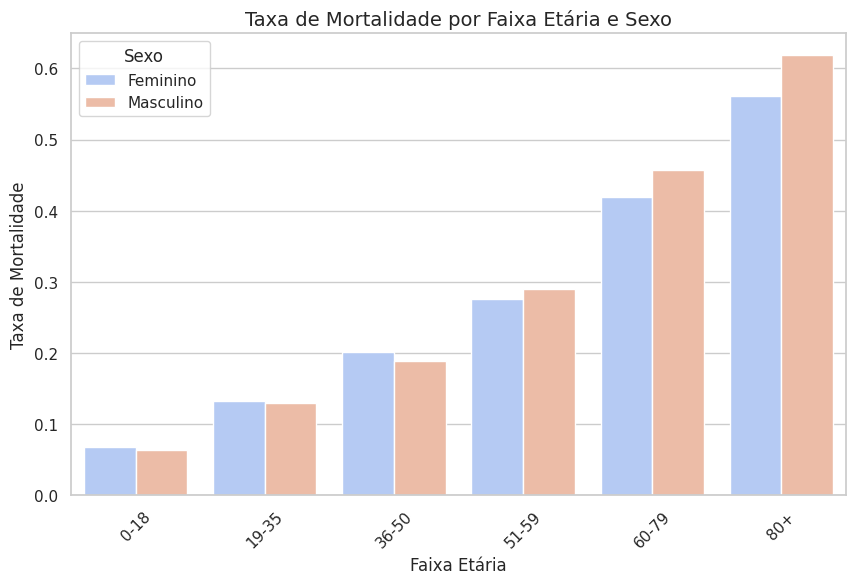

In [ ]:
#@title **Taxa de Mortalidade por Faixa Et√°ria e Sexo**
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

# Definir caminho do arquivo
file_path = "/content/drive/MyDrive/Colab Notebooks/INFLUD21-01-05-2023.csv"

# Definir as colunas necess√°rias
colunas_necessarias = ['NU_IDADE_N', 'TP_IDADE', 'EVOLUCAO', 'CS_SEXO', 'CLASSI_FIN']

# Carregar apenas as colunas necess√°rias
df = pd.read_csv(file_path, usecols=colunas_necessarias, delimiter=';', encoding='latin1')

# Remover espa√ßos extras dos nomes das colunas
df.columns = df.columns.str.strip()

# Filtrar apenas casos confirmados de COVID-19
df_covid = df[df['CLASSI_FIN'] == 5].copy()

# Remover valores nulos das colunas essenciais
df_covid.dropna(subset=['NU_IDADE_N', 'TP_IDADE', 'CS_SEXO', 'EVOLUCAO'], inplace=True)

# Filtrar apenas sexo v√°lido (M e F)
df_covid = df_covid[df_covid['CS_SEXO'].isin(['M', 'F'])]

# Converter idade para anos
df_covid['IDADE_ANOS'] = np.where(df_covid['TP_IDADE'] == 1, df_covid['NU_IDADE_N'] / 365,
                          np.where(df_covid['TP_IDADE'] == 2, df_covid['NU_IDADE_N'] / 12, df_covid['NU_IDADE_N']))

# Criar faixas et√°rias
bins = [0, 18, 35, 50, 60, 80, 100]
labels = ['0-18', '19-35', '36-50', '51-59', '60-79', '80+']
df_covid['FAIXA_IDADE'] = pd.cut(df_covid['IDADE_ANOS'], bins=bins, labels=labels, right=False)

# Criar coluna de √≥bito (EVOLUCAO == 2 indica √≥bito)
df_covid['OBITO'] = np.where(df_covid['EVOLUCAO'] == 2, 1, 0)

# Criar tabela com taxa de mortalidade por faixa et√°ria e sexo
taxa_mortalidade = df_covid.groupby(['FAIXA_IDADE', 'CS_SEXO'])['OBITO'].sum() / df_covid.groupby(['FAIXA_IDADE', 'CS_SEXO']).size()

# Transformar em DataFrame
taxa_mortalidade = taxa_mortalidade.reset_index().rename(columns={0: 'Taxa Mortalidade'})

# Exibir tabela com taxas de mortalidade
print("Taxa de Mortalidade por Faixa Et√°ria e Sexo:")
print(taxa_mortalidade)

# Criar gr√°fico da taxa de mortalidade por faixa et√°ria e sexo
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=taxa_mortalidade, x='FAIXA_IDADE', y='Taxa Mortalidade', hue='CS_SEXO', palette='coolwarm')

# Adicionar t√≠tulos e r√≥tulos
plt.title('Taxa de Mortalidade por Faixa Et√°ria e Sexo', fontsize=14)
plt.xlabel('Faixa Et√°ria', fontsize=12)
plt.ylabel('Taxa de Mortalidade', fontsize=12)

# legenda
handles, labels = ax.get_legend_handles_labels()
labels = ['Masculino' if label == 'M' else 'Feminino' for label in labels]
plt.legend(handles, labels, title='Sexo')

plt.xticks(rotation=45)
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

üìä Distribui√ß√£o de Comorbidades em Pacientes Infectados:
   Comorbidade  Frequ√™ncia
0   CARDIOPATI      337585
10   OUT_MORBI      284824
4     DIABETES      236686
9    OBESIDADE      110822
5   NEUROLOGIC       30603
8        RENAL       30497
6   PNEUMOPATI       28228
3         ASMA       26014
7   IMUNODEPRE       19959
2     HEPATICA        7196
1   HEMATOLOGI        5837


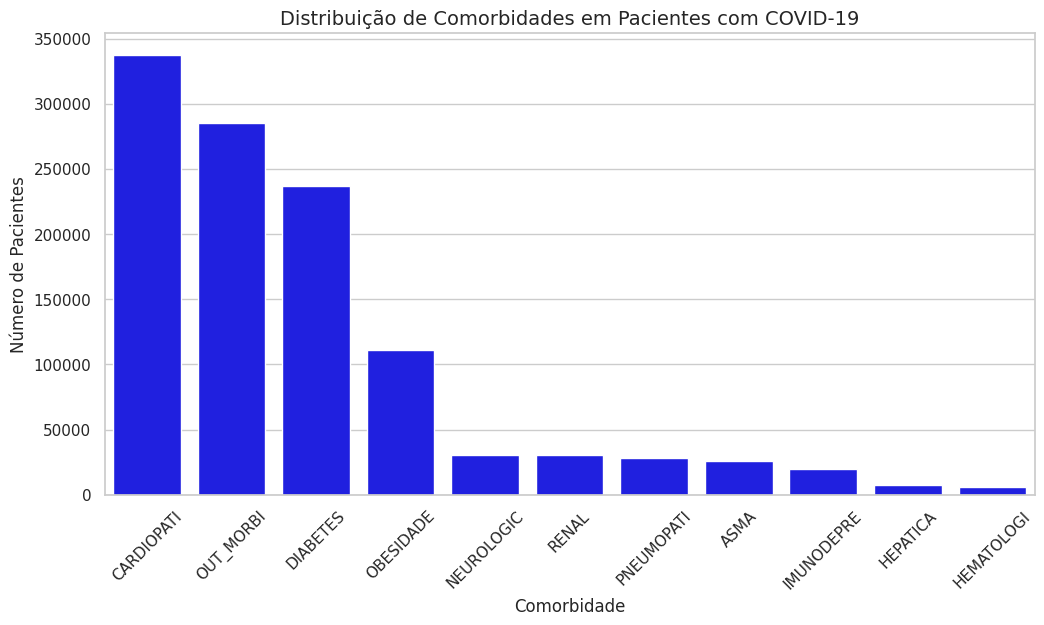


üìä Probabilidade de √ìbito para cada Comorbidade:
   Comorbidade  Probabilidade de √ìbito
8        RENAL                0.567859
5   NEUROLOGIC                0.538673
6   PNEUMOPATI                0.526499
2     HEPATICA                0.523485
7   IMUNODEPRE                0.490005
1   HEMATOLOGI                0.456056
4     DIABETES                0.439430
0   CARDIOPATI                0.430665
10   OUT_MORBI                0.411661
9    OBESIDADE                0.405641
3         ASMA                0.299147


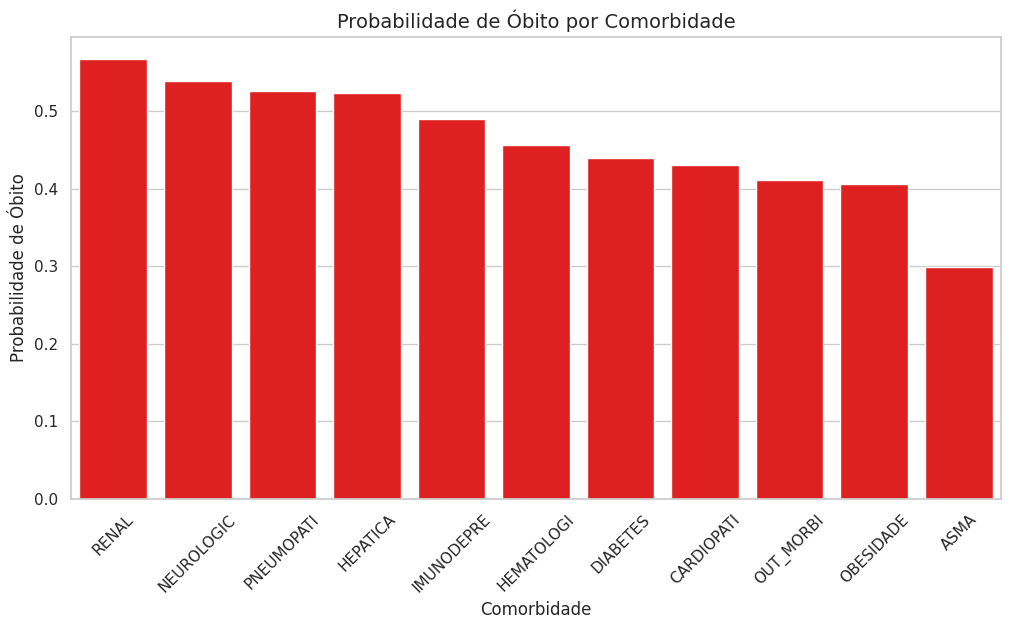

In [13]:
#@title **Distribui√ß√£o de Comorbidades e Probabilidade de √ìbito**
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

# Definir caminho do arquivo
file_path = "/content/drive/MyDrive/Colab Notebooks/INFLUD21-01-05-2023.csv"

# Definir as colunas necess√°rias para a an√°lise de comorbidades e √≥bitos
colunas_necessarias = ['CLASSI_FIN', 'EVOLUCAO', 'CARDIOPATI', 'HEMATOLOGI', 'HEPATICA', 'ASMA',
                       'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI', 'IMUNODEPRE', 'RENAL',
                       'OBESIDADE', 'OUT_MORBI']

# Carregar apenas as colunas necess√°rias
df = pd.read_csv(file_path, usecols=colunas_necessarias, delimiter=';', encoding='latin1')

# Remover espa√ßos extras dos nomes das colunas
df.columns = df.columns.str.strip()

# Verifica√ß√£o
if 'CLASSI_FIN' not in df.columns:
    print("Erro: A coluna 'CLASSI_FIN' n√£o foi encontrada na base de dados.")
else:
    # Filtrar apenas casos confirmados de COVID-19
    df_covid = df[df['CLASSI_FIN'] == 5].copy()

    # Remover valores nulos da coluna EVOLUCAO
    df_covid.dropna(subset=['EVOLUCAO'], inplace=True)

    # Criar coluna de √≥bito (EVOLUCAO == 2 indica √≥bito)
    df_covid['OBITO'] = np.where(df_covid['EVOLUCAO'] == 2, 1, 0)

    # Remover a coluna CLASSI_FIN, pois n√£o ser√° mais necess√°ria
    df_covid.drop(columns=['CLASSI_FIN'], inplace=True)

    # Verificar se h√° colunas de comorbidades na base
    comorbidades_existentes = [col for col in df_covid.columns if col in colunas_necessarias and col not in ['EVOLUCAO']]

    if not comorbidades_existentes:
        print("Erro: Nenhuma coluna de comorbidade foi encontrada na base de dados.")
    else:
        # Criar uma contagem de pacientes com cada comorbidade (1 = Sim)
        comorbidade_freq = df_covid[comorbidades_existentes].apply(lambda x: (x == 1).sum())

        # Criar um DataFrame para exibi√ß√£o
        comorbidade_df = pd.DataFrame({'Comorbidade': comorbidade_freq.index, 'Frequ√™ncia': comorbidade_freq.values})

        # Exibir a tabela de distribui√ß√£o de comorbidades
        print("\nüìä Distribui√ß√£o de Comorbidades em Pacientes Infectados:")
        print(comorbidade_df.sort_values(by='Frequ√™ncia', ascending=False))

        # gr√°fico da distribui√ß√£o de comorbidades
        plt.figure(figsize=(12, 6))
        sns.barplot(data=comorbidade_df.sort_values(by='Frequ√™ncia', ascending=False),
                    x='Comorbidade', y='Frequ√™ncia', color='blue')  # Cor √∫nica

        # Adicionar t√≠tulos e r√≥tulos
        plt.title('Distribui√ß√£o de Comorbidades em Pacientes com COVID-19', fontsize=14)
        plt.xlabel('Comorbidade', fontsize=12)
        plt.ylabel('N√∫mero de Pacientes', fontsize=12)
        plt.xticks(rotation=45)

        # Exibir gr√°fico
        plt.show()

        # **C√°lculo da Probabilidade de √ìbito para cada Comorbidade**
        prob_mortalidade = {}

        for comorbidade in comorbidades_existentes:
            total_comorbidos = df_covid[df_covid[comorbidade] == 1].shape[0]
            total_comorbidos_obito = df_covid[(df_covid[comorbidade] == 1) & (df_covid['OBITO'] == 1)].shape[0]

            if total_comorbidos > 0:
                prob_mortalidade[comorbidade] = total_comorbidos_obito / total_comorbidos
            else:
                prob_mortalidade[comorbidade] = np.nan  # Caso n√£o haja pacientes com essa comorbidade

        # Transformar em DataFrame corretamente
        prob_mortalidade_df = pd.DataFrame({'Comorbidade': list(prob_mortalidade.keys()),
                                            'Probabilidade de √ìbito': list(prob_mortalidade.values())})

        # Remover valores NaN antes de ordenar
        prob_mortalidade_df.dropna(inplace=True)

        # Exibir a tabela de probabilidades de √≥bito
        print("\nüìä Probabilidade de √ìbito para cada Comorbidade:")
        print(prob_mortalidade_df.sort_values(by='Probabilidade de √ìbito', ascending=False))

        # Criar gr√°fico de probabilidade de √≥bito por comorbidade sem gradiente
        plt.figure(figsize=(12, 6))
        sns.barplot(data=prob_mortalidade_df.sort_values(by='Probabilidade de √ìbito', ascending=False),
                    x='Comorbidade', y='Probabilidade de √ìbito', color='red')  # Cor √∫nica

        # Adicionar t√≠tulos e r√≥tulos
        plt.title('Probabilidade de √ìbito por Comorbidade', fontsize=14)
        plt.xlabel('Comorbidade', fontsize=12)
        plt.ylabel('Probabilidade de √ìbito', fontsize=12)
        plt.xticks(rotation=45)

        # Exibir gr√°fico
        plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-9-98030788656f>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid['CASOS'] = 1
<ipython-input-9-98030788656f>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid['OBITOS'] = np.where(df_covid['EVOLUCAO'] == 2, 1, 0)  # EVOLUCAO == 2 indica √≥bito


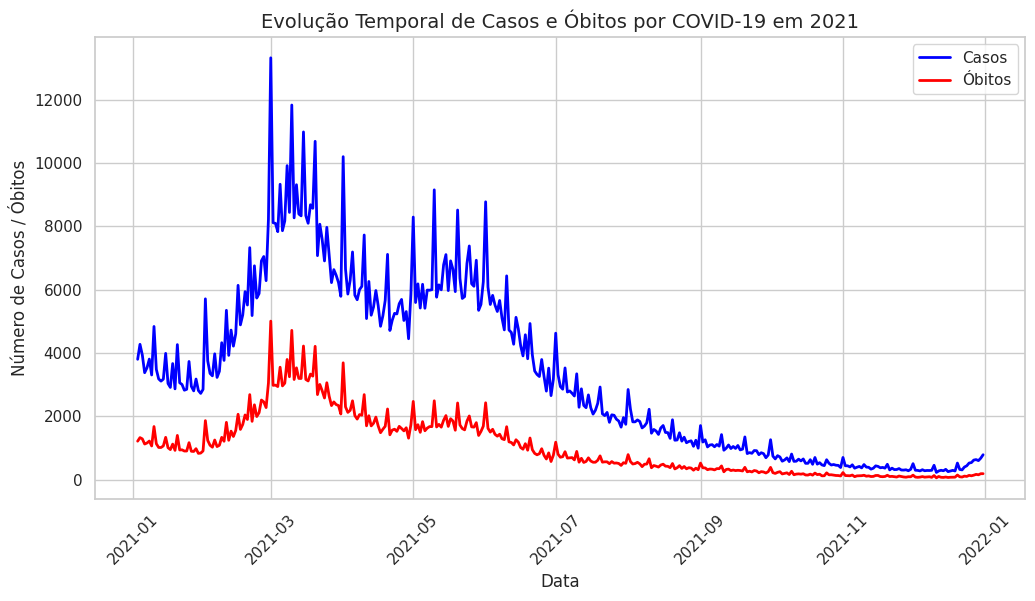

In [ ]:
#@title **An√°lise Temporal de Casos e √ìbitos**
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

# Definir caminho do arquivo
file_path = "/content/drive/MyDrive/Colab Notebooks/INFLUD21-01-05-2023.csv"

# Definir as colunas necess√°rias para a an√°lise temporal
colunas_necessarias = ['DT_SIN_PRI', 'CLASSI_FIN', 'EVOLUCAO']

# Carregar apenas as colunas necess√°rias
df = pd.read_csv(file_path, usecols=colunas_necessarias, delimiter=';', encoding='latin1')

# Remover espa√ßos extras dos nomes das colunas
df.columns = df.columns.str.strip()

# Filtrar apenas casos confirmados de COVID-19
df_covid = df[df['CLASSI_FIN'] == 5].copy()

# Converter a coluna de data para o formato datetime
df_covid['DT_SIN_PRI'] = pd.to_datetime(df_covid['DT_SIN_PRI'], errors='coerce', format='%d/%m/%Y')

# Filtrar apenas casos de 2021
df_covid = df_covid[(df_covid['DT_SIN_PRI'] >= '2021-01-01') & (df_covid['DT_SIN_PRI'] <= '2021-12-31')]

# Criar colunas para contagem de casos e √≥bitos
df_covid['CASOS'] = 1
df_covid['OBITOS'] = np.where(df_covid['EVOLUCAO'] == 2, 1, 0)  # EVOLUCAO == 2 indica √≥bito

# Agrupar por data
casos_diarios = df_covid.groupby('DT_SIN_PRI')['CASOS'].sum()
obitos_diarios = df_covid.groupby('DT_SIN_PRI')['OBITOS'].sum()

# Criar gr√°fico da evolu√ß√£o temporal de casos e √≥bitos
plt.figure(figsize=(12, 6))
plt.plot(casos_diarios.index, casos_diarios.values, label='Casos', color='blue', linewidth=2)
plt.plot(obitos_diarios.index, obitos_diarios.values, label='√ìbitos', color='red', linewidth=2)

# Adicionar t√≠tulos e r√≥tulos
plt.title('Evolu√ß√£o Temporal de Casos e √ìbitos por COVID-19 em 2021', fontsize=14)
plt.xlabel('Data', fontsize=12)
plt.ylabel('N√∫mero de Casos / √ìbitos', fontsize=12)
plt.legend()
plt.xticks(rotation=45)

# Exibir gr√°fico
plt.show()


In [ ]:
#@title **Propor√ß√£o de √ìbitos por Idade e Comorbidades**
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

# Definir caminho do arquivo
file_path = "/content/drive/MyDrive/Colab Notebooks/INFLUD21-01-05-2023.csv"

# Definir as colunas necess√°rias para a an√°lise de √≥bitos e comorbidades
colunas_necessarias = ['CLASSI_FIN', 'NU_IDADE_N', 'TP_IDADE', 'EVOLUCAO',
                       'DIABETES', 'CARDIOPATI', 'OBESIDADE', 'RENAL',
                       'PNEUMOPATI', 'IMUNODEPRE', 'HEPATICA', 'NEUROLOGIC']

# Carregar apenas as colunas necess√°rias (evita uso excessivo de RAM)
df = pd.read_csv(file_path, usecols=colunas_necessarias, delimiter=';', encoding='latin1')

# Remover espa√ßos extras dos nomes das colunas
df.columns = df.columns.str.strip()

# Verificar se a coluna CLASSI_FIN existe antes de continuar
if 'CLASSI_FIN' not in df.columns:
    print("Erro: A coluna 'CLASSI_FIN' n√£o foi encontrada na base de dados.")
else:
    # Filtrar apenas casos confirmados de COVID-19
    df_covid = df[df['CLASSI_FIN'] == 5].copy()

    # Remover valores nulos das colunas essenciais
    df_covid.dropna(subset=['NU_IDADE_N', 'TP_IDADE', 'EVOLUCAO'], inplace=True)

    # Converter idade para anos de forma eficiente
    df_covid['IDADE_ANOS'] = np.where(df_covid['TP_IDADE'] == 1, df_covid['NU_IDADE_N'] / 365,
                              np.where(df_covid['TP_IDADE'] == 2, df_covid['NU_IDADE_N'] / 12, df_covid['NU_IDADE_N']))

    # Criar faixas et√°rias
    bins = [0, 18, 35, 50, 60, 80, 100]
    labels = ['0-18', '19-35', '36-50', '51-59', '60-79', '80+']
    df_covid['FAIXA_IDADE'] = pd.cut(df_covid['IDADE_ANOS'], bins=bins, labels=labels, right=False)

    # Criar coluna de √≥bito (EVOLUCAO == 2 indica √≥bito)
    df_covid['OBITO'] = np.where(df_covid['EVOLUCAO'] == 2, 1, 0)

    # **Verificar todas as colunas de comorbidades dispon√≠veis** (evita erro caso faltem algumas)
    comorbidades_existentes = [col for col in colunas_necessarias if col in df_covid.columns and col not in ['CLASSI_FIN', 'NU_IDADE_N', 'TP_IDADE', 'EVOLUCAO']]

    # Criar coluna indicando presen√ßa de qualquer comorbidade
    df_covid['COMORBIDADE'] = df_covid[comorbidades_existentes].apply(lambda x: (x == 1).any(), axis=1)

    # **Converter valores booleanos para texto leg√≠vel**
    df_covid['COMORBIDADE'] = df_covid['COMORBIDADE'].map({True: 'Com Comorbidade', False: 'Sem Comorbidade'})

    # Calcular a propor√ß√£o de √≥bitos por faixa et√°ria e comorbidades
    proporcao_obitos = df_covid.groupby(['FAIXA_IDADE', 'COMORBIDADE'])['OBITO'].mean().reset_index()

    # Exibir tabela de propor√ß√£o de √≥bitos
    print("\nPropor√ß√£o de √ìbitos por Faixa Et√°ria e Comorbidades:")
    print(proporcao_obitos)

    # Criar gr√°fico de propor√ß√£o de √≥bitos por faixa et√°ria e comorbidade
    plt.figure(figsize=(10, 6))
    sns.barplot(data=proporcao_obitos, x='FAIXA_IDADE', y='OBITO', hue='COMORBIDADE', palette='coolwarm')

    # Adicionar t√≠tulos e r√≥tulos
    plt.title('Propor√ß√£o de √ìbitos por Faixa Et√°ria e Comorbidades', fontsize=14)
    plt.xlabel('Faixa Et√°ria', fontsize=12)
    plt.ylabel('Propor√ß√£o de √ìbitos', fontsize=12)
    plt.legend(title='Comorbidade')
    plt.xticks(rotation=45)

    # Exibir gr√°fico
    plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#@title **Propor√ß√£o de mulheres idosas infectadas em 2021**
import pandas as pd
import numpy as np
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

# Definir caminho do arquivo
file_path = "/content/drive/MyDrive/Colab Notebooks/INFLUD21-01-05-2023.csv"

# Definir colunas necess√°rias
colunas_necessarias = ['CLASSI_FIN', 'CS_SEXO', 'NU_IDADE_N', 'TP_IDADE', 'DT_SIN_PRI']

# Carregar apenas as colunas necess√°rias
df = pd.read_csv(file_path, usecols=colunas_necessarias, delimiter=';', encoding='latin1')

# Remover espa√ßos extras dos nomes das colunas
df.columns = df.columns.str.strip()

# Verificar se a coluna CLASSI_FIN existe antes de continuar
if 'CLASSI_FIN' not in df.columns:
    print("Erro: A coluna 'CLASSI_FIN' n√£o foi encontrada na base de dados.")
else:
    # Filtrar apenas casos confirmados de COVID-19
    df_covid = df[df['CLASSI_FIN'] == 5].copy()

    # Remover valores nulos essenciais
    df_covid.dropna(subset=['CS_SEXO', 'NU_IDADE_N', 'TP_IDADE', 'DT_SIN_PRI'], inplace=True)

    # Converter a data para formato datetime
    df_covid['DT_SIN_PRI'] = pd.to_datetime(df_covid['DT_SIN_PRI'], errors='coerce', format='%d/%m/%Y')
    df_covid = df_covid[(df_covid['DT_SIN_PRI'] >= '2021-01-01') & (df_covid['DT_SIN_PRI'] <= '2021-12-31')]

    # Converter idade para anos
    df_covid['IDADE_ANOS'] = np.where(df_covid['TP_IDADE'] == 1, df_covid['NU_IDADE_N'] / 365,
                              np.where(df_covid['TP_IDADE'] == 2, df_covid['NU_IDADE_N'] / 12, df_covid['NU_IDADE_N']))

    # Filtrar apenas mulheres idosas (idade >= 60 anos)
    mulheres_idosas = df_covid[(df_covid['CS_SEXO'] == 'F') & (df_covid['IDADE_ANOS'] >= 60)]

    # Calcular o n√∫mero total de mulheres idosas infectadas
    total_mulheres_idosas = len(mulheres_idosas)

    # Calcular a propor√ß√£o de mulheres idosas no total de infectados
    proporcao_mulheres_idosas = total_mulheres_idosas / len(df_covid)

    # Exibir resultados
    print(f"N√∫mero total de mulheres idosas infectadas em 2021: {total_mulheres_idosas}")
    print(f"Propor√ß√£o de mulheres idosas entre os infectados: {proporcao_mulheres_idosas:.2%}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
N√∫mero total de mulheres idosas infectadas em 2021: 254342
Propor√ß√£o de mulheres idosas entre os infectados: 21.02%


<ipython-input-3-3ec72a0179b4>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid['IDADE_ANOS'] = np.where(df_covid['TP_IDADE'] == 1, df_covid['NU_IDADE_N'] / 365,


In [ ]:
#@title **Qual a probabilidade de um paciente ser homem?**
import pandas as pd
import numpy as np
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

# Definir caminho do arquivo
file_path = "/content/drive/MyDrive/Colab Notebooks/INFLUD21-01-05-2023.csv"

# Definir colunas necess√°rias
colunas_necessarias = ['CLASSI_FIN', 'CS_SEXO']

# Carregar apenas as colunas necess√°rias
df = pd.read_csv(file_path, usecols=colunas_necessarias, delimiter=';', encoding='latin1')

# Remover espa√ßos extras dos nomes das colunas
df.columns = df.columns.str.strip()

# Verificar se a coluna CLASSI_FIN existe antes de continuar
if 'CLASSI_FIN' not in df.columns:
    print("Erro: A coluna 'CLASSI_FIN' n√£o foi encontrada na base de dados.")
else:
    # Filtrar apenas casos confirmados de COVID-19
    df_covid = df[df['CLASSI_FIN'] == 5].copy()

    # Remover valores nulos da coluna de sexo
    df_covid.dropna(subset=['CS_SEXO'], inplace=True)

    # Contar total de infectados por COVID-19
    total_infectados = len(df_covid)

    # Contar total de homens infectados (CS_SEXO == 'M')
    total_homens = len(df_covid[df_covid['CS_SEXO'] == 'M'])

    # Calcular a probabilidade
    prob_homem = total_homens / total_infectados

    # Exibir resultados
    print(f"Total de infectados por COVID-19: {total_infectados}")
    print(f"Total de homens infectados: {total_homens}")
    print(f"Probabilidade de um paciente infectado ser homem: {prob_homem:.2%}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Total de infectados por COVID-19: 1211609
Total de homens infectados: 674803
Probabilidade de um paciente infectado ser homem: 55.69%


In [14]:
#@title **An√°lise de casos por tipo de atendimento (hospitais, UTI, casa)**

import pandas as pd
import numpy as np
import scipy.stats as stats
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

# Definir caminho do arquivo
file_path = "/content/drive/MyDrive/Colab Notebooks/INFLUD21-01-05-2023.csv"

# Definir colunas necess√°rias
colunas_necessarias = ['CLASSI_FIN', 'CS_SEXO', 'HOSPITAL', 'UTI']

# Carregar apenas as colunas necess√°rias
df = pd.read_csv(file_path, usecols=colunas_necessarias, delimiter=';', encoding='latin1')

# Remover espa√ßos extras dos nomes das colunas
df.columns = df.columns.str.strip()

# Verificar valores √∫nicos em CS_SEXO antes da filtragem
print("\nValores √∫nicos em CS_SEXO antes da filtragem:", df['CS_SEXO'].unique())

# Filtrar apenas casos confirmados de COVID-19
df_covid = df[df['CLASSI_FIN'] == 5].copy()

# Filtrar apenas sexo v√°lido (M e F)
df_covid = df_covid[df_covid['CS_SEXO'].isin(['M', 'F'])]

# Remover valores nulos das colunas essenciais
df_covid.dropna(subset=['CS_SEXO', 'HOSPITAL', 'UTI'], inplace=True)

# Verificar valores √∫nicos em HOSPITAL e UTI
print("\nValores √∫nicos em HOSPITAL:", df_covid['HOSPITAL'].unique())
print("Valores √∫nicos em UTI:", df_covid['UTI'].unique())

# Criar uma coluna para definir o tipo de atendimento
df_covid['TIPO_ATENDIMENTO'] = np.where(df_covid['UTI'] == 1, 'UTI',
                                np.where(df_covid['HOSPITAL'] == 1, 'Hospital', 'Casa'))

# Criar Tabela de Conting√™ncia comparando tipo de atendimento por sexo
tabela_contingencia = pd.crosstab(df_covid['CS_SEXO'], df_covid['TIPO_ATENDIMENTO'])

# Exibir tabela de conting√™ncia corrigida
print("Tabela de Conting√™ncia:")
print(tabela_contingencia)

# Realizar o teste qui-quadrado
chi2, p, dof, expected = stats.chi2_contingency(tabela_contingencia)

# Exibir resultados do teste qui-quadrado
print("Resultados do Teste Qui-Quadrado:")
print(f"Estat√≠stica Qui-Quadrado: {chi2:.4f}")
print(f"p-valor: {p:.4f}")
print(f"Graus de liberdade: {dof}")
print("\nFrequ√™ncias esperadas:")
print(expected)

# Interpretar o p-valor
alpha = 0.05
if p < alpha:
    print("Conclus√£o: H√° diferen√ßa estatisticamente significativa na distribui√ß√£o dos tipos de atendimento entre homens e mulheres.")
else:
    print("Conclus√£o: N√£o h√° evid√™ncia estat√≠stica de diferen√ßa na distribui√ß√£o dos tipos de atendimento entre homens e mulheres.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Valores √∫nicos em CS_SEXO antes da filtragem: ['M' 'F' 'I']

Valores √∫nicos em HOSPITAL: [1. 2.]
Valores √∫nicos em UTI: [1. 2. 9.]
Tabela de Conting√™ncia:
TIPO_ATENDIMENTO  Casa  Hospital     UTI
CS_SEXO                                 
F                    0    303718  170185
M                    2    375505  224571
Resultados do Teste Qui-Quadrado:
Estat√≠stica Qui-Quadrado: 262.1259
p-valor: 0.0000
Graus de liberdade: 2

Frequ√™ncias esperadas:
[[8.82516544e-01 2.99712767e+05 1.74189350e+05]
 [1.11748346e+00 3.79510233e+05 2.20566650e+05]]
Conclus√£o: H√° diferen√ßa estatisticamente significativa na distribui√ß√£o dos tipos de atendimento entre homens e mulheres.


In [19]:
#@title **Testes de Hip√≥teses sobre a Mortalidade entre Diferentes Grupos**
import pandas as pd
import numpy as np
import scipy.stats as stats
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

# Definir caminho do arquivo
file_path = "/content/drive/MyDrive/Colab Notebooks/INFLUD21-01-05-2023.csv"

# Definir colunas necess√°rias
colunas_necessarias = ['CLASSI_FIN', 'CS_SEXO', 'NU_IDADE_N', 'TP_IDADE', 'EVOLUCAO']

# Carregar apenas as colunas necess√°rias
df = pd.read_csv(file_path, usecols=colunas_necessarias, delimiter=';', encoding='latin1')

# Remover espa√ßos extras dos nomes das colunas
df.columns = df.columns.str.strip()

# Filtrar apenas casos confirmados de COVID-19
df_covid = df[df['CLASSI_FIN'] == 5].copy()

# Remover valores nulos das colunas essenciais
df_covid.dropna(subset=['CS_SEXO', 'NU_IDADE_N', 'TP_IDADE', 'EVOLUCAO'], inplace=True)

# Converter idade para anos
df_covid['IDADE_ANOS'] = np.where(df_covid['TP_IDADE'] == 1, df_covid['NU_IDADE_N'] / 365,
                          np.where(df_covid['TP_IDADE'] == 2, df_covid['NU_IDADE_N'] / 12, df_covid['NU_IDADE_N']))

# Criar coluna bin√°ria para mortalidade (EVOLUCAO == 2 indica √≥bito)
df_covid['MORTALIDADE'] = np.where(df_covid['EVOLUCAO'] == 2, 1, 0)

# **Teste t de Student: Compara√ß√£o entre homens e mulheres**
homens = df_covid[df_covid['CS_SEXO'] == 'M']['MORTALIDADE']
mulheres = df_covid[df_covid['CS_SEXO'] == 'F']['MORTALIDADE']

t_stat, p_valor_t = stats.ttest_ind(homens, mulheres, equal_var=False)

print("\n**Teste t de Student: Mortalidade entre Homens e Mulheres**")
print(f"Estat√≠stica t: {t_stat:.4f}")
print(f"p-valor: {p_valor_t:.4f}")

if p_valor_t < 0.05:
    print("Conclus√£o: H√° diferen√ßa estatisticamente significativa na mortalidade entre homens e mulheres.")
else:
    print("Conclus√£o: N√£o h√° evid√™ncia estat√≠stica de diferen√ßa na mortalidade entre homens e mulheres.")

# **ANOVA: Compara√ß√£o entre diferentes faixas et√°rias**
bins = [0, 18, 35, 50, 60, 80, 100]
labels = ['0-18', '19-35', '36-50', '51-59', '60-79', '80+']
df_covid['FAIXA_IDADE'] = pd.cut(df_covid['IDADE_ANOS'], bins=bins, labels=labels, right=False)

grupos = [df_covid[df_covid['FAIXA_IDADE'] == faixa]['MORTALIDADE'] for faixa in labels]

anova_stat, p_valor_anova = stats.f_oneway(*grupos)

print("\n**ANOVA: Mortalidade por Faixa Et√°ria**")
print(f"Estat√≠stica F: {anova_stat:.4f}")
print(f"p-valor: {p_valor_anova:.4f}")

if p_valor_anova < 0.05:
    print("Conclus√£o: H√° diferen√ßa estatisticamente significativa na mortalidade entre as faixas et√°rias.")
else:
    print("Conclus√£o: N√£o h√° evid√™ncia estat√≠stica de diferen√ßa na mortalidade entre as faixas et√°rias.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

**Teste t de Student: Mortalidade entre Homens e Mulheres**
Estat√≠stica t: -4.8569
p-valor: 0.0000
Conclus√£o: H√° diferen√ßa estatisticamente significativa na mortalidade entre homens e mulheres.

**ANOVA: Mortalidade por Faixa Et√°ria**
Estat√≠stica F: 23522.9297
p-valor: 0.0000
Conclus√£o: H√° diferen√ßa estatisticamente significativa na mortalidade entre as faixas et√°rias.


In [17]:
#@title **An√°lise de Diferen√ßas entre Regi√µes em Termos de Propor√ß√£o de √ìbitos**
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import levene
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

# Definir caminho do arquivo
file_path = "/content/drive/MyDrive/Colab Notebooks/INFLUD21-01-05-2023.csv"

# Definir colunas necess√°rias
colunas_necessarias = ['CLASSI_FIN', 'SG_UF_NOT', 'EVOLUCAO']

# Carregar apenas as colunas necess√°rias
df = pd.read_csv(file_path, usecols=colunas_necessarias, delimiter=';', encoding='latin1')

# Remover espa√ßos extras dos nomes das colunas
df.columns = df.columns.str.strip()

# Filtrar apenas casos confirmados de COVID-19
df_covid = df[df['CLASSI_FIN'] == 5].copy()

# Remover valores nulos das colunas essenciais
df_covid.dropna(subset=['SG_UF_NOT', 'EVOLUCAO'], inplace=True)

# Criar uma coluna bin√°ria para √≥bito (EVOLUCAO == 2 indica √≥bito)
df_covid['OBITO'] = np.where(df_covid['EVOLUCAO'] == 2, 1, 0)

# Padronizar nomes dos estados para evitar duplica√ß√£o
df_covid['SG_UF_NOT'] = df_covid['SG_UF_NOT'].str.upper().str.strip()

# Criar tabela de conting√™ncia
tabela_obitos = pd.crosstab(df_covid['SG_UF_NOT'], df_covid['OBITO'])

# Teste Qui-Quadrado: Diferen√ßa na propor√ß√£o de √≥bitos entre regi√µes
chi2, p, dof, expected = stats.chi2_contingency(tabela_obitos)

# Exibir resultados do teste Qui-Quadrado
print("\n**Teste Qui-Quadrado: Diferen√ßa na Propor√ß√£o de √ìbitos entre Regi√µes**")
print(f"Estat√≠stica Qui-Quadrado: {chi2:.4f}")
print(f"p-valor: {p:.4f}")
print(f"Graus de liberdade: {dof}")

if p < 0.05:
    print("Conclus√£o: H√° diferen√ßa estatisticamente significativa na propor√ß√£o de √≥bitos entre regi√µes.")
else:
    print("Conclus√£o: N√£o h√° evid√™ncia estat√≠stica de diferen√ßa na propor√ß√£o de √≥bitos entre regi√µes.")

# Criar lista de grupos de √≥bitos por estado
grupos_obitos = [df_covid[df_covid['SG_UF_NOT'] == uf]['OBITO'] for uf in df_covid['SG_UF_NOT'].unique()]

# Teste de homogeneidade de vari√¢ncias (Levene)
stat_levene, p_levene = levene(*grupos_obitos)

print(f"\nTeste de Homogeneidade de Vari√¢ncias (Levene): p-valor = {p_levene:.4f}")

if p_levene < 0.05:
    print("As vari√¢ncias entre os grupos s√£o diferentes. Vamos usar Welch ANOVA.")
    anova_stat, p_anova = stats.f_oneway(*grupos_obitos)
else:
    print("As vari√¢ncias entre os grupos s√£o homog√™neas. Podemos usar ANOVA padr√£o.")
    anova_stat, p_anova = stats.f_oneway(*grupos_obitos)

# Exibir resultados do teste ANOVA
print("\n**ANOVA: Diferen√ßa na Propor√ß√£o de √ìbitos entre Regi√µes**")
print(f"Estat√≠stica F: {anova_stat:.4f}")
print(f"p-valor: {p_anova:.4f}")

if p_anova < 0.05:
    print("Conclus√£o: H√° diferen√ßa estatisticamente significativa na propor√ß√£o de √≥bitos entre regi√µes.")
else:
    print("Conclus√£o: N√£o h√° evid√™ncia estat√≠stica de diferen√ßa na propor√ß√£o de √≥bitos entre regi√µes.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

**Teste Qui-Quadrado: Diferen√ßa na Propor√ß√£o de √ìbitos entre Regi√µes**
Estat√≠stica Qui-Quadrado: 8893.9396
p-valor: 0.0000
Graus de liberdade: 26
Conclus√£o: H√° diferen√ßa estatisticamente significativa na propor√ß√£o de √≥bitos entre regi√µes.

Teste de Homogeneidade de Vari√¢ncias (Levene): p-valor = 0.0000
As vari√¢ncias entre os grupos s√£o diferentes. Vamos usar Welch ANOVA.

**ANOVA: Diferen√ßa na Propor√ß√£o de √ìbitos entre Regi√µes**
Estat√≠stica F: 344.7159
p-valor: 0.0000
Conclus√£o: H√° diferen√ßa estatisticamente significativa na propor√ß√£o de √≥bitos entre regi√µes.


In [18]:
#@title **Intervalo de Confian√ßa para a Taxa de Mortalidade**
import pandas as pd
import numpy as np
import scipy.stats as stats
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

# Definir caminho do arquivo
file_path = "/content/drive/MyDrive/Colab Notebooks/INFLUD21-01-05-2023.csv"

# Definir colunas necess√°rias
colunas_necessarias = ['CLASSI_FIN', 'EVOLUCAO']

# Carregar apenas as colunas necess√°rias
df = pd.read_csv(file_path, usecols=colunas_necessarias, delimiter=';', encoding='latin1')

# Remover espa√ßos extras dos nomes das colunas
df.columns = df.columns.str.strip()

# Filtrar apenas casos confirmados de COVID-19
df_covid = df[df['CLASSI_FIN'] == 5].copy()

# Remover valores nulos na coluna EVOLUCAO
df_covid.dropna(subset=['EVOLUCAO'], inplace=True)

# Criar uma vari√°vel bin√°ria para √≥bito (EVOLUCAO == 2 indica √≥bito)
df_covid['OBITO'] = np.where(df_covid['EVOLUCAO'] == 2, 1, 0)

# Calcular a propor√ß√£o de √≥bitos
total_infectados = len(df_covid)
total_obitos = df_covid['OBITO'].sum()
taxa_mortalidade = total_obitos / total_infectados

#**C√°lculo do Intervalo de Confian√ßa (IC) para propor√ß√µes**
# F√≥rmula do erro padr√£o para propor√ß√µes:
erro_padrao = np.sqrt((taxa_mortalidade * (1 - taxa_mortalidade)) / total_infectados)

# C√°lculo do Intervalo de Confian√ßa de 95% usando a distribui√ß√£o normal (Z = 1.96)
z = 1.96
ic_inferior = taxa_mortalidade - z * erro_padrao
ic_superior = taxa_mortalidade + z * erro_padrao

# Exibir resultados
print("\n**Intervalo de Confian√ßa para a Taxa de Mortalidade (95%)**")
print(f"Total de infectados: {total_infectados}")
print(f"Total de √≥bitos: {total_obitos}")
print(f"Taxa de mortalidade estimada: {taxa_mortalidade:.2%}")
print(f"Intervalo de Confian√ßa (95%): [{ic_inferior:.4%}, {ic_superior:.4%}]")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

**Intervalo de Confian√ßa para a Taxa de Mortalidade (95%)**
Total de infectados: 1157247
Total de √≥bitos: 379340
Taxa de mortalidade estimada: 32.78%
Intervalo de Confian√ßa (95%): [32.6940%, 32.8650%]
